In [1]:
!pip install flask==0.12.2

     |████████████████████████████████| 92kB 9.2MB/s eta 0:00:011


In [2]:
!pip install flask-ngrok

In [3]:
!pip install tweepy

In [4]:
!pip install textblob

In [6]:
!pip install matplotlib

In [39]:
import tweepy
from tweepy import OAuthHandler
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

In [8]:
consumer_key = "GCeaLvXMf0vhyFWxOmfveIaw1"
consumer_secret = "blWTrbFx5V1yv3swilaQDI5vvdUJNH66QyeoXO4vFMu3vQqy8S"

access_token = "840489927284514817-5JaikUdITcdmAcc5klw77FpIWKfUFIZ"
access_secret = "mqrRablqauzEhuiQK82ZwqxjxKQK7P8kfd09Ju2zHxouI"


auth = OAuthHandler(consumer_key, consumer_secret)

In [9]:
auth.set_access_token(access_token, access_secret)

In [10]:
api = tweepy.API(auth)

In [11]:
topicToSearch = "covid"
numOfTopics = 100

In [17]:
fetched_tweets = api.search(q = topicToSearch, count = numOfTopics)

In [14]:
len(fetched_tweets)

100

In [16]:
fetched_tweets[0].text

'RT @PartidoPSUV: Nueva Esparta registra 92% de pacientes recuperados del Covid-19 https://t.co/bbtgJxsBgp   https://t.co/TcXoFfoz9L'

In [18]:
fetched_tweets_eng = api.search(q = topicToSearch, count = numOfTopics, lang = "eng")

In [19]:
fetched_tweets_eng[0].text

'CANADEXPORT -TRADE CONNECTIONS IN INDIA HELP QUEBEC-BASED COMPANY SUPPLY CANADIANS WITH DISINFECTANT/@joeducanton S… https://t.co/NbTWrZp5Uf'

In [21]:
def clean_text(tweet):
    return re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", "", tweet)

In [23]:
clean_text(fetched_tweets[1].text)

'RT @HELIODOPTERO: Una fuente del Departamento de Justicia, con la que hablé hoy sobre el prófugo Álex Saab, me reveló el el jefe paramilita…'

In [24]:
clean_text(fetched_tweets[1].text)

'RT Una fuente del Departamento de Justiciacon la que hablhoy sobre el prófugo Álex Saabme revelel el jefe paramilita…'

In [27]:
demo_tweet = fetched_tweets_eng[4].text

In [30]:
demo_tweet = clean_text(demo_tweet)

In [31]:
blob = TextBlob(demo_tweet)

In [32]:
blob.sentiment.polarity

-0.05000000000000001

In [35]:
pos,neg,neut = [0,0,0]


for tweet in fetched_tweets_eng:
    blob = TextBlob(clean_text(tweet.text))
    polarity = blob.sentiment.polarity
    
    if polarity > 0:
        pos += 1
    elif polarity < 0:
        neg += 1
    else:
        neut += 1

In [36]:
pos

5

In [37]:
neg

79

In [38]:
neut

16

([<matplotlib.patches.Wedge at 0x7f7d66fb0438>,
 [Text(1.096334057654164, 0.17364225876081132, 'Postive'),
  Text(-1.1290569520496656, 0.40648542289769657, 'Negative'),
  Text(0.9639374160215285, -0.5299289178689335, 'Neutral')])

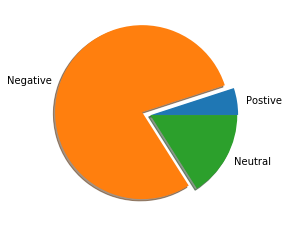

In [47]:
sizes = [pos, neg, neut]
labels = ["Postive", "Negative", "Neutral"]

fig1, ax = plt.subplots()

ax.pie(sizes, labels = labels, shadow = True, explode = (0.01,0.1,0))